In [77]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from itertools import combinations
from statsmodels.stats.multitest import multipletests
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_ind


In [78]:
# Read the CSV file with proper separator and quote handling
df = pd.read_csv('Berlin Marathon women.csv', sep=',', quotechar='"')

# Rename columns explicitly
df.rename(columns={'agegroup': 'age_group', 'time': 'time'}, inplace=True)
# Print the column names to check
print(df.columns)

Index(['time', 'age_group'], dtype='object')


In [79]:
#checking the datset
print(df.isnull().sum())
print(df.describe())


time         0
age_group    0
dtype: int64
               time    age_group
count   2829.000000  2829.000000
mean   16054.917992    38.776953
std     2114.529377     7.067773
min     8802.000000    30.000000
25%    14587.000000    35.000000
50%    16017.000000    40.000000
75%    17382.000000    45.000000
max    25254.000000    55.000000


###Task 1: Showing Freequency Distribution

Counts by age group:
age_group
30    657
35    686
40    661
45    458
50    251
55    116
Name: count, dtype: int64


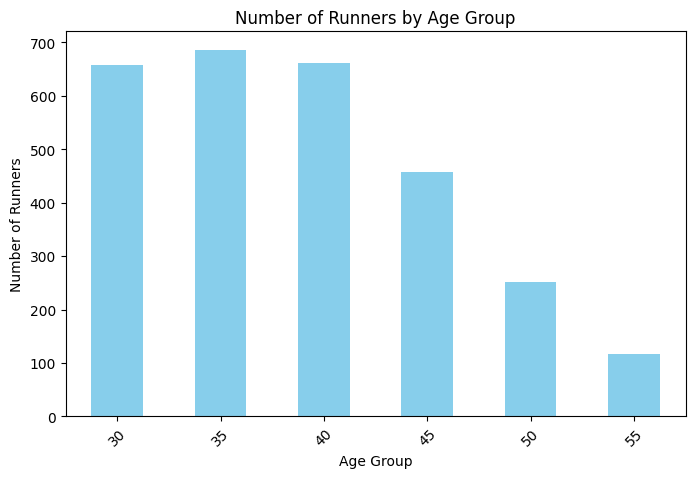

In [80]:
# Count the number of runners in each age group
age_group_counts = df['age_group'].value_counts().sort_index()

# Display the counts
print("Counts by age group:")
print(age_group_counts)

# Visualize age group distribution
age_group_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Number of Runners by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Runners')
plt.xticks(rotation=45)
plt.show()

Descriptive statistics for finish time:
count     2829.000000
mean     16054.917992
std       2114.529377
min       8802.000000
25%      14587.000000
50%      16017.000000
75%      17382.000000
max      25254.000000
Name: time, dtype: float64


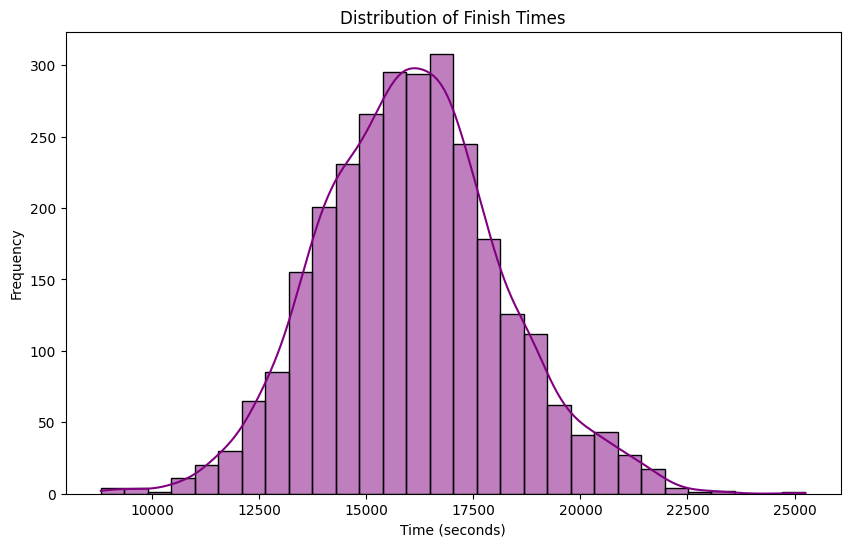

In [81]:
# Basic descriptive statistics for the time column
time_stats = df['time'].describe()
print("Descriptive statistics for finish time:")
print(time_stats)

# Visualize distribution of finish times
plt.figure(figsize=(10, 6))
sns.histplot(df['time'], kde=True, bins=30, color='purple')
plt.title('Distribution of Finish Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()

Grouped descriptive statistics by age group:
           count          mean          std      min       25%      50%  \
age_group                                                                 
30         657.0  15935.200913  2091.516558   8979.0  14543.00  15935.0   
35         686.0  15928.749271  2168.780190   8802.0  14409.00  15851.5   
40         661.0  15995.394856  2123.196163   9605.0  14533.00  15941.0   
45         458.0  16105.969432  1972.153908  11218.0  14635.25  16067.5   
50         251.0  16448.968127  2189.249495  10783.0  14910.50  16412.0   
55         116.0  16764.077586  2045.042936  11259.0  15432.75  16845.0   

                75%      max  
age_group                     
30         17278.00  23190.0  
35         17301.50  22237.0  
40         17260.00  25254.0  
45         17350.00  21722.0  
50         17760.00  23175.0  
55         17980.25  21839.0  


C:\Users\xyzsi\AppData\Local\Temp\ipykernel_1888\3376066293.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='time', palette='Set2')


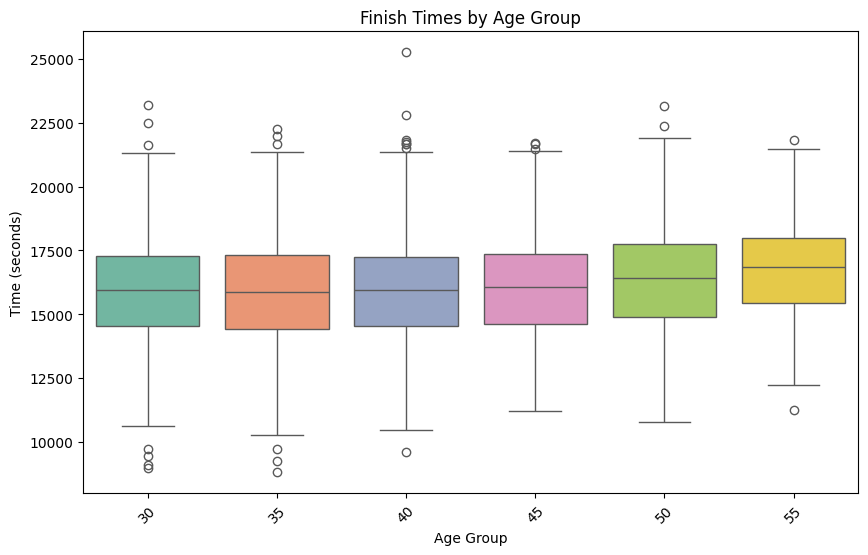

In [82]:
# Group descriptive statistics for finish times by age group
grouped_stats = df.groupby('age_group')['time'].describe()
print("Grouped descriptive statistics by age group:")
print(grouped_stats)

# Boxplot of finish times across age groups
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='time', palette='Set2')
plt.title('Finish Times by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45)
plt.show()


###Task2: Conducting a global test 

In [83]:
#For a global test we perform One way ANOVA test 
#For this we check the assumptions 
# 1. Normality:Test for normality using Shapiro test and graphicaly display using Q-Q plots.
# 2. Homogeneity of Variances: Using Levene's test and visualize with boxplots.


In [84]:
from scipy.stats import shapiro

# Normality Check for each age group
age_groups = df['age_group'].unique()
normality_results = {}

print("Shapiro-Wilk Test Results:")
for group in age_groups:
    group_data = df[df['age_group'] == group]['time']
    stat, p_value = shapiro(group_data)
    normality_results[group] = p_value
    print(f"Age Group {group}: W = {stat:.4f}, p = {p_value:.4f}")
    if p_value > 0.05:
       print(f"  -> Data is normally distributed for Age Group {group}")
    else:
       print(f"  -> Data is NOT normally distributed for Age Group {group}")


Shapiro-Wilk Test Results:
Age Group 35: W = 0.9958, p = 0.0595
  -> Data is normally distributed for Age Group 35
Age Group 30: W = 0.9980, p = 0.6471
  -> Data is normally distributed for Age Group 30
Age Group 40: W = 0.9917, p = 0.0010
  -> Data is NOT normally distributed for Age Group 40
Age Group 50: W = 0.9938, p = 0.3964
  -> Data is normally distributed for Age Group 50
Age Group 45: W = 0.9942, p = 0.0785
  -> Data is normally distributed for Age Group 45
Age Group 55: W = 0.9944, p = 0.9255
  -> Data is normally distributed for Age Group 55


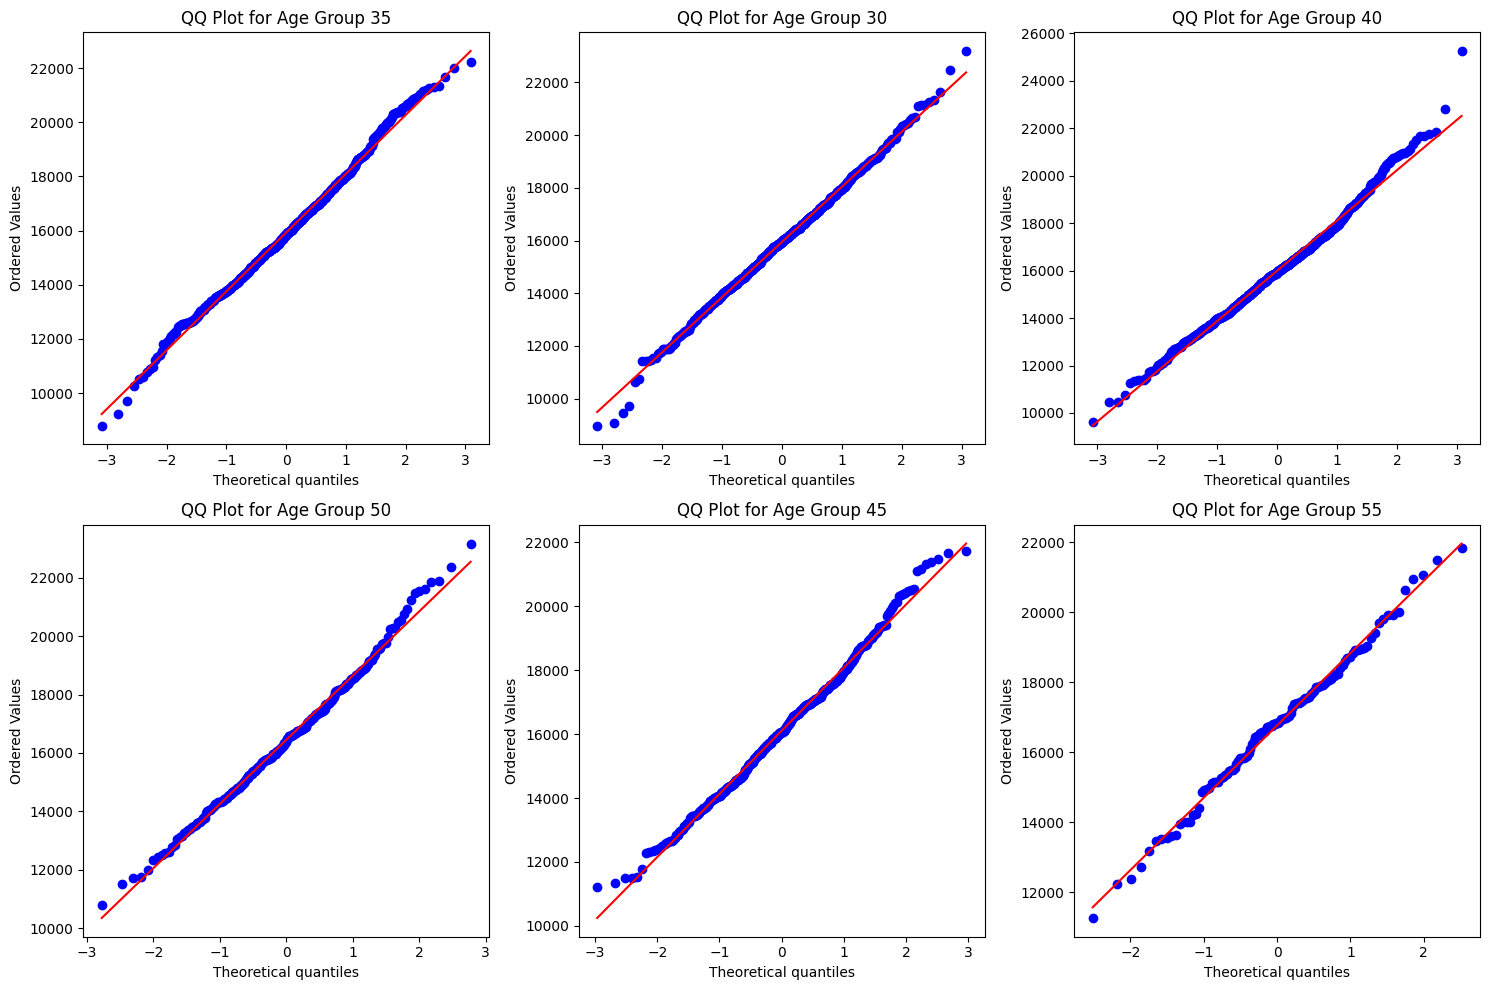

In [85]:
# Normality representation QQ Plots
age_groups = df['age_group'].unique()
plt.figure(figsize=(15, 10))
for i, group in enumerate(age_groups, 1):
    plt.subplot(2, 3, i)
    stats.probplot(df[df['age_group'] == group]['time'], dist="norm", plot=plt)
    plt.title(f'QQ Plot for Age Group {group}')

plt.tight_layout()
plt.show()


Levene's Test for Homogeneity of Variances:
Test Statistic = 0.9415, p = 0.4528
  -> Variances are equal; the assumption is satisfied.


C:\Users\xyzsi\AppData\Local\Temp\ipykernel_1888\2658546215.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='time', showmeans=True, palette='Set2')


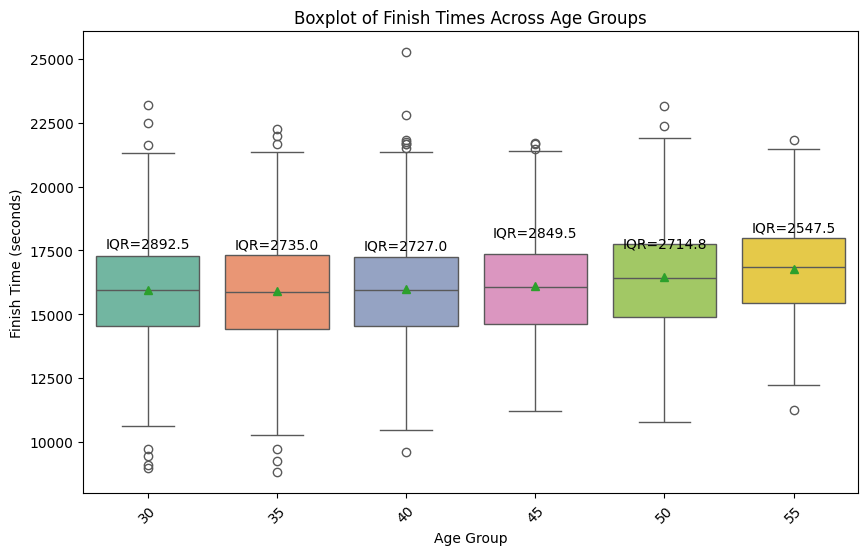

In [86]:


from scipy.stats import levene

# Levene's Test for Homogeneity of Variances
group_data = [df[df['age_group'] == group]['time'] for group in age_groups]
stat, p_value = levene(*group_data)

print("\nLevene's Test for Homogeneity of Variances:")
print(f"Test Statistic = {stat:.4f}, p = {p_value:.4f}")
if p_value > 0.05:
    print("  -> Variances are equal; the assumption is satisfied.")
else:
    print("  -> Variances are NOT equal; consider Welch’s ANOVA or Kruskal-Wallis test.")

# Homogeneity Check with Boxplot (and IQR Display)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_group', y='time', showmeans=True, palette='Set2')
plt.title('Boxplot of Finish Times Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Finish Time (seconds)')

# Annotate IQR on the boxplot
for i, group in enumerate(age_groups):
    group_data = df[df['age_group'] == group]['time']
    q1, q3 = group_data.quantile([0.25, 0.75])
    iqr = q3 - q1
    plt.text(i, q3 + iqr * 0.1, f"IQR={iqr:.1f}", ha='center', color='black', fontsize=10)

plt.xticks(rotation=45)
plt.show()


In [87]:
# One-Way ANOVA
# Prepare data for ANOVA
grouped_data = [df[df['age_group'] == group]['time'] for group in age_groups]

# Perform ANOVA
anova_result = stats.f_oneway(*grouped_data)

# Print ANOVA result
print("One-Way ANOVA Results:")
print(f"F-statistic: {anova_result.statistic:.3f}")
print(f"P-value: {anova_result.pvalue:.3e}")

# Interpretation
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Result: The p-value is less than 0.05, so we reject the null hypothesis.")
    print("There is a significant difference in finish times across age groups.")
else:
    print("Result: The p-value is greater than 0.05, so we fail to reject the null hypothesis.")
    print("There is no significant difference in finish times across age groups.")

One-Way ANOVA Results:
F-statistic: 5.463
P-value: 5.215e-05
Result: The p-value is less than 0.05, so we reject the null hypothesis.
There is a significant difference in finish times across age groups.


In [88]:
##Task 3: Conduct the pairwise T-test and Adjust p value 

In [89]:
from itertools import combinations
from scipy.stats import ttest_ind
import pandas as pd

# Get unique age groups
age_groups = df['age_group'].unique()

# Pairwise comparisons
pairwise_results = []
for group1, group2 in combinations(age_groups, 2):
    group1_data = df[df['age_group'] == group1]['time']
    group2_data = df[df['age_group'] == group2]['time']
    t_stat, p_value = ttest_ind(group1_data, group2_data)
    pairwise_results.append({
        'Group 1': group1,
        'Group 2': group2,
        'T-Statistic': t_stat,
        'P-Value': p_value,
        'Significant (Unadjusted)': p_value < 0.05
    })

# Create DataFrame of results
pairwise_df = pd.DataFrame(pairwise_results)
print(pairwise_df)








    Group 1  Group 2  T-Statistic   P-Value  Significant (Unadjusted)
0        35       30    -0.055453  0.955786                     False
1        35       40    -0.569656  0.569006                     False
2        35       50    -3.243406  0.001223                      True
3        35       45    -1.403680  0.160686                     False
4        35       55    -3.867530  0.000119                      True
5        30       40    -0.518464  0.604222                     False
6        30       50    -3.267573  0.001126                      True
7        30       45    -1.372913  0.170056                     False
8        30       55    -3.948013  0.000086                      True
9        40       50    -2.856671  0.004379                      True
10       40       45    -0.881718  0.378119                     False
11       40       55    -3.615907  0.000319                      True
12       50       45     2.128910  0.033607                      True
13       50       55

In [90]:
# Apply Bonferroni correction
num_comparisons = len(pairwise_results)  # Number of pairwise comparisons = 15
bonferroni_alpha = 0.05 / num_comparisons  # Adjusted alpha = 0.0033

# Add the Bonferroni-adjusted p-values
pairwise_df['Adjusted P-Value (Bonferroni)'] = pairwise_df['P-Value'] * num_comparisons

# Ensure the adjusted p-value doesn't exceed 1 (by definition)
pairwise_df['Adjusted P-Value (Bonferroni)'] = pairwise_df['Adjusted P-Value (Bonferroni)'].clip(upper=1)

# Add a new significance column based on adjusted p-value
pairwise_df['Significant (Bonferroni)'] = pairwise_df['Adjusted P-Value (Bonferroni)'] < 0.05

# Display the updated DataFrame
pairwise_df[['Group 1', 'Group 2', 'T-Statistic', 'P-Value', 'Adjusted P-Value (Bonferroni)', 'Significant (Bonferroni)']]


,Group 1,Group 2,T-Statistic,P-Value,Adjusted P-Value (Bonferroni),Significant (Bonferroni)
0,35,30,-0.055453,0.955786,1.000000,False
1,35,40,-0.569656,0.569006,1.000000,False
2,35,50,-3.243406,0.001223,0.018344,True
3,35,45,-1.403680,0.160686,1.000000,False
4,35,55,-3.867530,0.000119,0.001783,True
5,30,40,-0.518464,0.604222,1.000000,False
6,30,50,-3.267573,0.001126,0.016883,True
7,30,45,-1.372913,0.170056,1.000000,False
8,30,55,-3.948013,0.000086,0.001290,True
9,40,50,-2.856671,0.004379,0.065679,False


Tukey's HSD Results:


,Group 1,Group 2,Mean Difference,p-value,Lower CI,Upper CI,Reject
0,30,35,-6.4516,1.0000,-334.3197,321.4164,False
1,30,40,60.1939,0.9955,-270.6934,391.0812,False
2,30,45,170.7685,0.7673,-194.8497,536.3867,False
3,30,50,513.7672,0.0131,68.0810,959.4534,True
4,30,55,828.8767,0.0013,223.9763,1433.7771,True
5,35,40,66.6456,0.9923,-260.7153,394.0065,False
6,35,45,177.2202,0.7305,-185.2097,539.6501,False
7,35,50,520.2189,0.0107,77.1444,963.2933,True
8,35,55,835.3283,0.0011,232.3497,1438.3070,True
9,40,45,110.5746,0.9551,-254.5889,475.7381,False


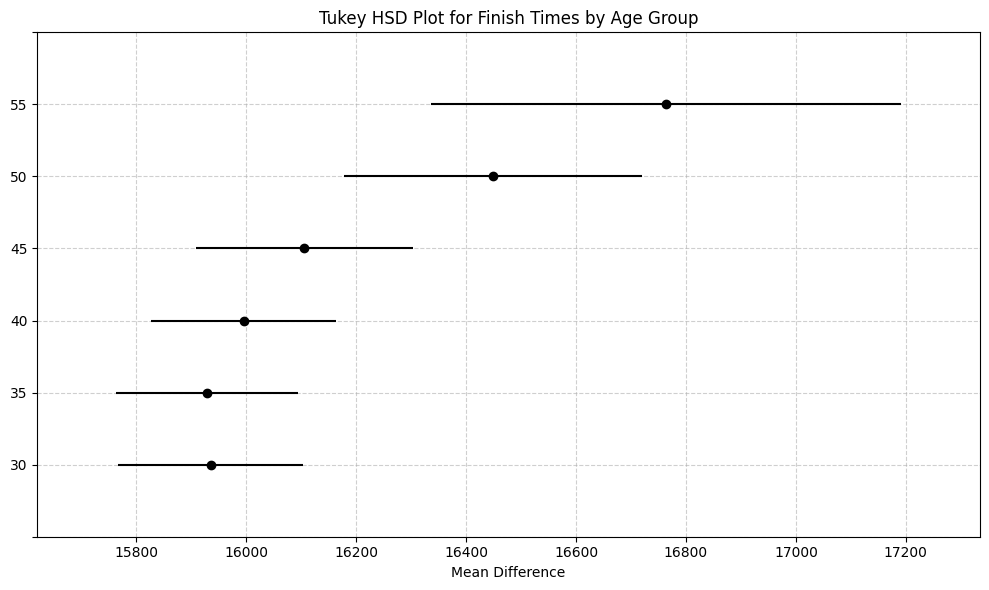

In [91]:


import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(
    endog=df['time'],        # Dependent variable (finish time)
    groups=df['age_group'],  # Independent variable (age group)
    alpha=0.05               # Significance level
)

# Convert Tukey results to a DataFrame for better handling
tukey_df = pd.DataFrame(
    data=tukey_result.summary().data[1:],  # Skip the header row
    columns=tukey_result.summary().data[0]  # Use the header row
)

# Rename columns for clarity
tukey_df.columns = ['Group 1', 'Group 2', 'Mean Difference', 'p-value', 'Lower CI', 'Upper CI', 'Reject']

# Display the Tukey's HSD results
print("Tukey's HSD Results:")
display(tukey_df)

# Plot Tukey's HSD results
fig = tukey_result.plot_simultaneous()
plt.title("Tukey HSD Plot for Finish Times by Age Group")
plt.xlabel("Mean Difference")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [92]:
#Task 4: Comparasion 

In [93]:
from itertools import combinations
from scipy.stats import ttest_ind
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

# Step 1: Re-run your pairwise t-test for all age groups (this part is already handled in your code).
age_groups = df['age_group'].unique()
pairwise_results = []
for group1, group2 in combinations(age_groups, 2):
    group1_data = df[df['age_group'] == group1]['time']
    group2_data = df[df['age_group'] == group2]['time']
    t_stat, p_value = ttest_ind(group1_data, group2_data)
    pairwise_results.append({
        'Group 1': group1,
        'Group 2': group2,
        'T-Statistic': t_stat,
        'P-Value (Non-Adjusted)': p_value,
        'Significant (Unadjusted)': p_value < 0.05
    })

# Create DataFrame of results
pairwise_df = pd.DataFrame(pairwise_results)

# Step 2: Apply Bonferroni correction
num_comparisons = len(pairwise_results)
bonferroni_alpha = 0.05 / num_comparisons
pairwise_df['Adjusted P-Value (Bonferroni)'] = pairwise_df['P-Value (Non-Adjusted)'] * num_comparisons
pairwise_df['Adjusted P-Value (Bonferroni)'] = pairwise_df['Adjusted P-Value (Bonferroni)'].clip(upper=1)
pairwise_df['Significant (Bonferroni)'] = pairwise_df['Adjusted P-Value (Bonferroni)'] < 0.05

# Step 3: Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(
    endog=df['time'],
    groups=df['age_group'],
    alpha=0.05
)

# Convert Tukey's results to a DataFrame
tukey_df = pd.DataFrame(
    data=tukey_result.summary().data[1:],
    columns=tukey_result.summary().data[0]
)
tukey_df.columns = ['Group 1', 'Group 2', 'Mean Difference', 'p-value (Tukey HSD)', 'Lower CI', 'Upper CI', 'Reject']
tukey_df['Significant (Tukey HSD)'] = tukey_df['p-value (Tukey HSD)'] < 0.05

# Step 4: Merge results into a single DataFrame
final_df = pd.merge(pairwise_df[['Group 1', 'Group 2', 'P-Value (Non-Adjusted)', 'Significant (Unadjusted)', 'Adjusted P-Value (Bonferroni)', 'Significant (Bonferroni)']],
                     tukey_df[['Group 1', 'Group 2', 'p-value (Tukey HSD)', 'Significant (Tukey HSD)']],
                     on=['Group 1', 'Group 2'])

# Display the final comparison table
print(final_df)



    Group 1  Group 2  P-Value (Non-Adjusted)  Significant (Unadjusted)  \
0        35       40                0.569006                     False   
1        35       50                0.001223                      True   
2        35       45                0.160686                     False   
3        35       55                0.000119                      True   
4        30       40                0.604222                     False   
5        30       50                0.001126                      True   
6        30       45                0.170056                     False   
7        30       55                0.000086                      True   
8        40       50                0.004379                      True   
9        40       45                0.378119                     False   
10       40       55                0.000319                      True   
11       50       55                0.191505                     False   
12       45       55                0.

#Task 4: Please compare the results of these two correction methods with the non-adjusted
test and give a reasonable explanation using scatter plot

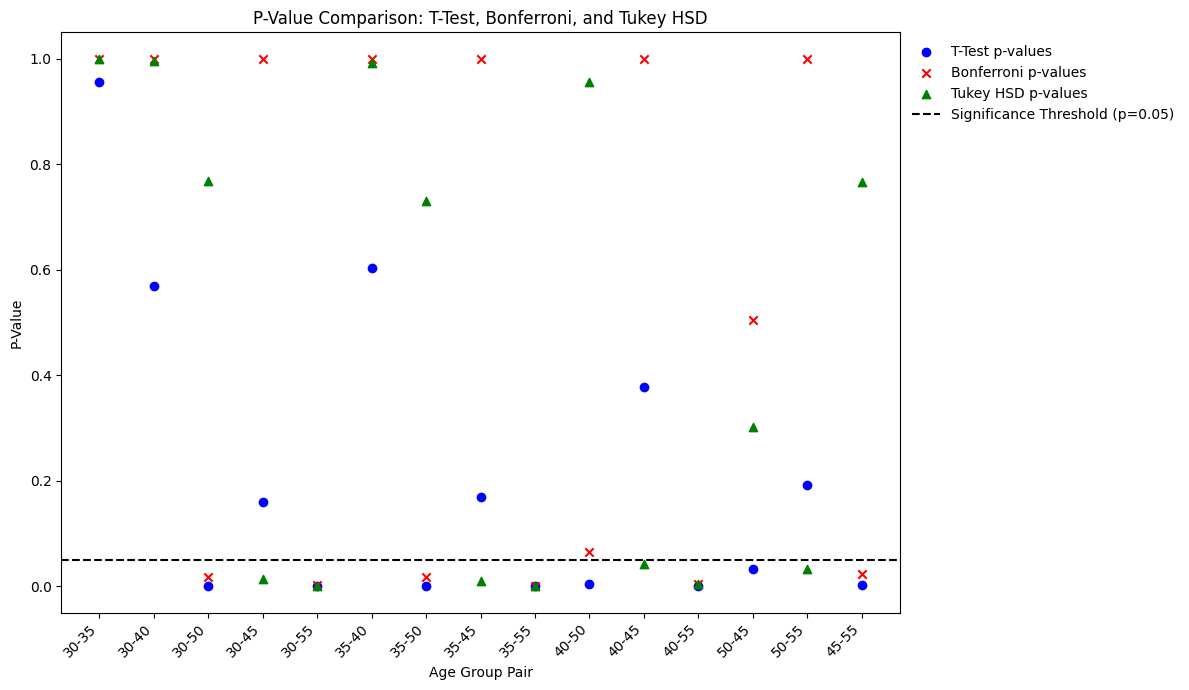

In [94]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the tests
t_test_p_values = [0.955786, 0.569006, 0.001223, 0.160686, 0.000119, 0.604222, 0.001126, 0.170056, 0.000086, 
                   0.004379, 0.378119, 0.000319, 0.033607, 0.191505, 0.001519]

bonferroni_p_values = [1.000000, 1.000000, 0.018344, 1.000000, 0.001783, 1.000000, 0.016883, 1.000000, 0.001290, 
                       0.065679, 1.000000, 0.004780, 0.504101, 1.000000, 0.022787]

tukey_p_values = [1.0000, 0.9955, 0.7673, 0.0131, 0.0013, 0.9923, 0.7305, 0.0107, 0.0011, 0.9551, 0.0430, 0.0040, 
                  0.3014, 0.0319, 0.7669]

# Age group pairs for x-axis
age_pairs = ['30-35', '30-40', '30-50', '30-45', '30-55', '35-40', '35-50', '35-45', '35-55', '40-50', '40-45', 
             '40-55', '50-45', '50-55', '45-55']

# Significance threshold
threshold = 0.05

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 7))

# Scatter plot for T-test p-values
ax.scatter(age_pairs, t_test_p_values, color='blue', label='T-Test p-values', marker='o')

# Scatter plot for Bonferroni p-values
ax.scatter(age_pairs, bonferroni_p_values, color='red', label='Bonferroni p-values', marker='x')

# Scatter plot for Tukey HSD p-values
ax.scatter(age_pairs, tukey_p_values, color='green', label='Tukey HSD p-values', marker='^')

# Adding significance threshold line
ax.axhline(y=threshold, color='black', linestyle='--', label='Significance Threshold (p=0.05)')

# Labeling the plot
ax.set_xlabel('Age Group Pair')
ax.set_ylabel('P-Value')
ax.set_title('P-Value Comparison: T-Test, Bonferroni, and Tukey HSD')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Move the legend to the right outside of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show plot
plt.show()
